<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/emgsignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow as tf 

In [3]:
#upload dataset from you PC
from google.colab import files
uploaded = files.upload()

Saving Book1.csv to Book1.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Book1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [27]:
data.shape
data.head()

,timestamp,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,label
0,1.560000e+15,4,-2,-15,1,2,0,-1,8,0
1,1.560000e+15,-12,-5,-12,-2,0,-1,-4,-26,0
2,1.560000e+15,0,0,12,-2,-3,-1,1,10,0
3,1.560000e+15,-5,-1,0,0,1,0,-2,-24,0
4,1.560000e+15,3,3,10,-1,0,-1,0,12,0


In [0]:
mydata= data.drop(columns="timestamp") #remove timestamp column

In [30]:
mydata.head() , mydata.shape

(   emg1  emg2  emg3  emg4  emg5  emg6  emg7  emg8  label
 0     4    -2   -15     1     2     0    -1     8      0
 1   -12    -5   -12    -2     0    -1    -4   -26      0
 2     0     0    12    -2    -3    -1     1    10      0
 3    -5    -1     0     0     1     0    -2   -24      0
 4     3     3    10    -1     0    -1     0    12      0, (19485, 9))

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(mydata)

In [32]:
X.shape

(19485, 9)

In [35]:
y = mydata['label'].values

print(y.shape)
#one hot encoder
y =to_categorical(y)
print(y.shape)
#one shot data 
y[:5]

(19485,)
(19485, 10)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#do dataset shuffle 
from sklearn.utils import shuffle
shuffleData , shuffleLabel  = shuffle(X,y) 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(shuffleData, shuffleLabel, random_state=42, test_size=0.2)


In [0]:
np.random.seed(7)
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Dropout(0.25))
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Dense(10, activation='softmax'))




model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=9,activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))




In [65]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_23 (Dense)             (None, 12)                252       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                130       
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [67]:
history = model.fit(X_train,y_train, epochs=10 , batch_size=50 , validation_data=(X_test, y_test) )

Train on 15588 samples, validate on 3897 samples
Epoch 1/10
15588/15588 [==============================] - 1s 58us/sample - loss: 2.0161 - acc: 0.2725 - val_loss: 1.5286 - val_acc: 0.4054
Epoch 2/10
15588/15588 [==============================] - 1s 33us/sample - loss: 1.2033 - acc: 0.5655 - val_loss: 0.9160 - val_acc: 0.7762
Epoch 3/10
15588/15588 [==============================] - 1s 35us/sample - loss: 0.7094 - acc: 0.8686 - val_loss: 0.5142 - val_acc: 0.9435
Epoch 4/10
15588/15588 [==============================] - 1s 33us/sample - loss: 0.3927 - acc: 0.9684 - val_loss: 0.2803 - val_acc: 0.9910
Epoch 5/10
15588/15588 [==============================] - 1s 33us/sample - loss: 0.2176 - acc: 0.9918 - val_loss: 0.1567 - val_acc: 0.9967
Epoch 6/10
15588/15588 [==============================] - 1s 33us/sample - loss: 0.1209 - acc: 0.9970 - val_loss: 0.0856 - val_acc: 0.9992
Epoch 7/10
15588/15588 [==============================] - 1s 33us/sample - loss: 0.0682 - acc: 0.9994 - val_loss: 0.0

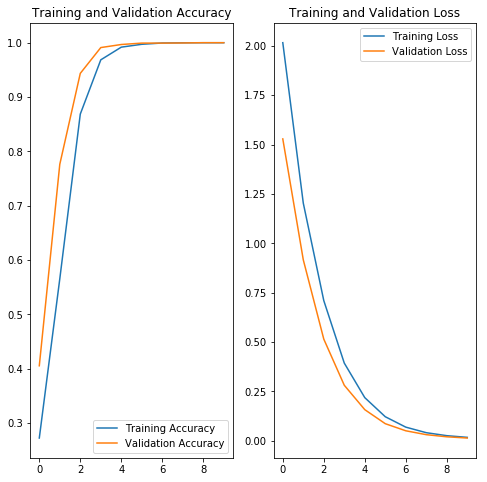

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()